# Aif360 - NBA Testset

original paper: Pelechrinis, K. Quantifying implicit biases in refereeing using NBA referees as a testbed. Sci Rep 13, 4664 (2023). https://doi.org/10.1038/s41598-023-31799-y

github: https://github.com/kpelechrinis/NBA-ref-analysis

Note: This notebook was discontinued due to aif360 not being able to load an R-Library in a Python-Environment.

OSError: cannot load library '...\R.dll'

In [ ]:
import sys
import os
import logging
import datetime
from typing import Literal

from aif360.sklearn.preprocessing import LearnedFairRepresentations


import pandas as pd
import matplotlib.pyplot as plt


from IPython.display import display, HTML

Provide a simple improvised config dictionary

In [4]:
cfg = {
    'main_path': os.getcwd(),
    'now': datetime.datetime.now(),
    'log': {
        'log_level': logging.INFO,
        'log_name': f'log',
        'log_fmt': '%(levelname)s: %(message)s'
    }
}

Load the data & look at some initial statistics

In [5]:
# Load the dataset
nba_dset_loc = os.path.join(cfg['main_path'], 'data/nba_data.csv')

nba_dset: pd.DataFrame = pd.read_csv(nba_dset_loc, low_memory=False)

print(f'Data shape of nba data: {nba_dset.shape}')

Data shape of nba data: (74144, 42)


In [6]:
# Initial look on the data
display(HTML(nba_dset.head().to_html()))
display(HTML(nba_dset.tail().to_html()))

,period,time,call_type,committing,disadvantaged,decision,comments,game_details,page,file,game_date,away_score,away_team,home_score,home_team,call,type,date,home,away,scrape_time,stint,game_id,home_bkref,bkref_id,nba_game_id,ref_1,ref_2,ref_3,attendance,committing_min,committing_team,committing_side,disadvantaged_min,disadvantaged_team,disadvantaged_side,type2,time_min,time_sec,time2,season,playoff
0,Q4,02:00.0,Turnover: Traveling,Shaun Livingston,NaN,CC,Livingston (GSW) moves his pivot foot heel to toe.,"Warriors @ Celtics (Mar 01, 2015)",1.0,L2M-GSW-BOS-3-1-15.pdf,"Mar 01, 2015",NaN,GSW,NaN,BOS,TURNOVER,TRAVELING,2015-03-01,BOS,GSW,NaN,NaN,NaN,BOS,201503010BOS,21400880,James Capers Jr.,Mark Lindsay,Violet Palmer,18624.0,19.566667,GSW,away,NaN,NaN,NaN,TRAVELING,2,0.0,2.000000,2015,False
1,Q4,00:45.0,Foul: Personal,Avery Bradley,Stephen Curry,CNC,Bradley (BOS) knocks the ball away from Curry (GSW) in the back court.,"Warriors @ Celtics (Mar 01, 2015)",1.0,L2M-GSW-BOS-3-1-15.pdf,"Mar 01, 2015",NaN,GSW,NaN,BOS,FOUL,PERSONAL,2015-03-01,BOS,GSW,NaN,NaN,NaN,BOS,201503010BOS,21400880,James Capers Jr.,Mark Lindsay,Violet Palmer,18624.0,33.983333,BOS,home,37.633333,GSW,away,PERSONAL,0,45.0,0.750000,2015,False
2,Q4,00:41.7,Turnover: 8 Second Violation,NaN,NaN,CNC,The ball passes over midcourt before eight seconds while still in team possession.,"Warriors @ Celtics (Mar 01, 2015)",1.0,L2M-GSW-BOS-3-1-15.pdf,"Mar 01, 2015",NaN,GSW,NaN,BOS,TURNOVER,8 SECOND VIOLATION,2015-03-01,BOS,GSW,NaN,NaN,NaN,BOS,201503010BOS,21400880,James Capers Jr.,Mark Lindsay,Violet Palmer,18624.0,NaN,NaN,NaN,NaN,NaN,NaN,8 SECOND VIOLATION,0,41.7,0.695000,2015,False
3,Q4,00:31.7,Foul: Personal,Isaiah Thomas,Andre Iguodala,CNC,Thomas (BOS) cleanly knocks the ball away from Iguodala (GSW),"Warriors @ Celtics (Mar 01, 2015)",1.0,L2M-GSW-BOS-3-1-15.pdf,"Mar 01, 2015",NaN,GSW,NaN,BOS,FOUL,PERSONAL,2015-03-01,BOS,GSW,NaN,NaN,NaN,BOS,201503010BOS,21400880,James Capers Jr.,Mark Lindsay,Violet Palmer,18624.0,28.783333,BOS,home,32.683333,GSW,away,PERSONAL,0,31.7,0.528333,2015,False
4,Q4,00:24.8,Turnover: Traveling,Jae Crowder,Harrison Barnes,INC,Crowder (BOS) moves his left pivot foot after receiving the ball.,"Warriors @ Celtics (Mar 01, 2015)",1.0,L2M-GSW-BOS-3-1-15.pdf,"Mar 01, 2015",NaN,GSW,NaN,BOS,TURNOVER,TRAVELING,2015-03-01,BOS,GSW,NaN,NaN,NaN,BOS,201503010BOS,21400880,James Capers Jr.,Mark Lindsay,Violet Palmer,18624.0,26.583333,BOS,home,30.033333,GSW,away,TRAVELING,0,24.8,0.413333,2015,False


,period,time,call_type,committing,disadvantaged,decision,comments,game_details,page,file,game_date,away_score,away_team,home_score,home_team,call,type,date,home,away,scrape_time,stint,game_id,home_bkref,bkref_id,nba_game_id,ref_1,ref_2,ref_3,attendance,committing_min,committing_team,committing_side,disadvantaged_min,disadvantaged_team,disadvantaged_side,type2,time_min,time_sec,time2,season,playoff
74139,Q4,00:23.3,Foul: Loose Ball,Kevin Durant,Terance Mann,CNC,Mann (LAC) is unable to secure the rebound and Durant (PHX) avoids contact with Mann's arm during his pursuit of the loose ball.,Suns(129) @ Clippers(124),NaN,NaN,"April 20, 2023",129.0,PHX,124.0,LAC,FOUL,LOOSE BALL,2023-04-20,LAC,PHX,2023-04-21T19:50:01Z,14.285714% Complete 00:31.2 To 00:23.3,gameId=0042200173,LAC,202304200LAC,42200173,Jacyn Goble,David Guthrie,Bill Kennedy,19068.0,41.500000,PHX,away,25.666667,LAC,home,LOOSE BALL,0,23.3,0.388333,2023,True
74140,Q4,00:19.4,Foul: Personal,Terance Mann,Kevin Durant,CC,Mann (LAC) commits a take foul on Durant (PHX).,Suns(129) @ Clippers(124),NaN,NaN,"April 20, 2023",129.0,PHX,124.0,LAC,FOUL,PERSONAL,2023-04-20,LAC,PHX,2023-04-21T19:50:01Z,8.163265% Complete 00:23.3 To 00:19.3,gameId=0042200173,LAC,202304200LAC,42200173,Jacyn Goble,David Guthrie,Bill Kennedy,19068.0,25.666667,LAC,home,41.500000,PHX,away,PERSONAL,0,19.4,0.323333,2023,True
74141,Q4,00:19.3,Foul: Personal,Torrey Craig,Norman Powell,CNC,Craig (PHX) adjusts to Powell's (LAC) path and marginal body contact occurs as they come together at the start of the drive.,Suns(129) @ Clippers(124),NaN,NaN,"April 20, 2023",129.0,PHX,124.0,LAC,FOUL,PERSONAL,2023-04-20,LAC,PHX,2023-04-21T19:50:01Z,4.0816326% Complete 00:19.3 To 00:16.4,gameId=0042200173,LAC,202304200LAC,42200173,Jacyn Goble,David Guthrie,Bill Kennedy,19068.0,27.266667,PHX,away,40.550000,LAC,home,PERSONAL,0,19.3,0.321667,2023,True
74142,Q4,00:16.3,Foul: Away from Play,Bones Hyland,Devin Booker,INC,"Hyland (LAC) grabs and pulls Booker's (PHX) jersey away from his body, affecting Booker's (PHX) FOM during the inbound. The illegal contact occurs prior to the inbound pass being released and an away from the play foul should be assessed.",Suns(129) @ Clippers(124),NaN,NaN,"April 20, 2023",129.0,PHX,124.0,LAC,FOUL,AWAY FROM PLAY,2023-04-20,LAC,PHX,2023-04-21T19:50:01Z,8.163265% Complete 00:16.4 To 00:11.6,gameId=0042200173,LAC,202304200LAC,42200173,Jacyn Goble,David Guthrie,Bill Kennedy,19068.0,21.383333,LAC,home,44.516667,PHX,away,AWAY FROM PLAY,0,16.3,0.271667,2023,True
74143,Q4,00:11.8,Foul: Personal,Russell Westbrook,Kevin Durant,CC,"Westbrook (LAC) moves into and extends his forearm to initiate contact with Durant's (PHX) body, which affects Durant's SQBR during the drive.",Suns(129) @ Clippers(124),NaN,NaN,"April 20, 2023",129.0,PHX,124.0,LAC,FOUL,PERSONAL,2023-04-20,LAC,PHX,2023-04-21T19:50:01Z,8.163265% Complete 00:16.4 To 00:11.6,gameId=0042200173,LAC,202304200LAC,42200173,Jacyn Goble,David Guthrie,Bill Kennedy,19068.0,39.816667,LAC,home,41.500000,PHX,away,PERSONAL,0,11.8,0.196667,2023,True


In [7]:
# Get a basic overview of the nba dataset
nba_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74144 entries, 0 to 74143
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              74144 non-null  object 
 1   time                74144 non-null  object 
 2   call_type           74085 non-null  object 
 3   committing          72634 non-null  object 
 4   disadvantaged       69017 non-null  object 
 5   decision            71658 non-null  object 
 6   comments            74088 non-null  object 
 7   game_details        74144 non-null  object 
 8   page                34140 non-null  float64
 9   file                34140 non-null  object 
 10  game_date           74144 non-null  object 
 11  away_score          63596 non-null  float64
 12  away_team           74144 non-null  object 
 13  home_score          63596 non-null  float64
 14  home_team           74144 non-null  object 
 15  call                74085 non-null  object 
 16  type

In [8]:
# Get a basic description of the numeric data
nba_desc = nba_dset.describe()
display(HTML(nba_desc.to_html()))


,page,away_score,home_score,nba_game_id,attendance,committing_min,disadvantaged_min,time_min,time_sec,time2,season
count,34140.000000,63596.000000,63596.000000,7.414400e+04,68539.000000,72111.000000,65204.000000,74144.000000,74144.000000,74144.000000,74144.000000
mean,1.341769,112.348340,112.707875,2.323685e+07,17130.731394,33.134601,34.298064,0.442490,26.619333,0.886146,2019.538277
std,0.595398,12.045645,12.409722,5.181565e+06,3871.128808,7.052690,6.719919,0.583721,17.564644,0.677525,2.339671
min,1.000000,78.000000,12.000000,2.140088e+07,204.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,1.000000,104.000000,104.000000,2.170046e+07,16270.000000,29.050000,30.533333,0.000000,11.000000,0.293333,2018.000000
50%,1.000000,112.000000,112.000000,2.190022e+07,18169.000000,33.916667,34.983333,0.000000,25.000000,0.786667,2019.000000
75%,2.000000,120.000000,120.000000,2.210079e+07,19520.000000,37.700000,38.516667,1.000000,41.400000,1.401667,2022.000000
max,6.000000,176.000000,175.000000,5.220020e+07,23143.000000,64.966667,64.966667,5.000000,59.900000,5.000000,2023.000000


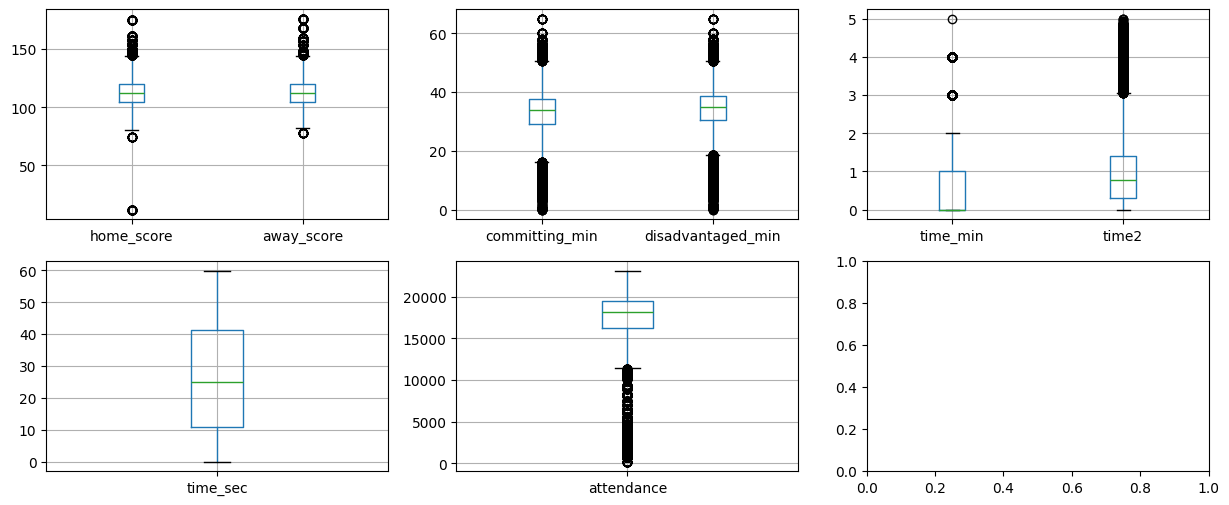

In [9]:
# Display boxplots for the data making sense to plot
nba_dset_num = nba_dset[['away_score', 'home_score', 'committing_min', 'disadvantaged_min', 'time_min', 'time_sec', 'time2', 'attendance']]

# Plot some boxplots for comparison 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,6))
nba_dset_num.boxplot(column=['home_score', 'away_score'], ax=axes[0, 0])
nba_dset_num.boxplot(column=['committing_min', 'disadvantaged_min'], ax=axes[0, 1])
nba_dset_num.boxplot(column=['time_min', 'time2'], ax=axes[0, 2])
nba_dset_num.boxplot(column=['time_sec'], ax=axes[1, 0])
nba_dset_num.boxplot(column=['attendance'], ax=axes[1, 1])
# nba_desc_trunc.plot(kind='hist', figsize=(20, 6))  #, subplots=[('away_score', 'home_score'), ('committing_min', 'disadvantaged_min'), ('time_min', 'time2'), ('time_sec',), ('attendance',)], 
plt.show()

In [10]:
# Overview skews
nba_dset.skew(numeric_only=True)

page                 1.888156
away_score           0.472475
home_score           0.120637
nba_game_id          3.565079
attendance          -2.507793
committing_min      -0.519856
disadvantaged_min   -0.520237
time_min             1.568197
time_sec             0.218454
time2                1.025841
season              -0.046019
playoff              3.493674
dtype: float64

In [11]:
# Overview standart error of the mean
nba_dset.sem(numeric_only=True)

page                     0.003222
away_score               0.047766
home_score               0.049209
nba_game_id          19029.305459
attendance              14.786614
committing_min           0.026264
disadvantaged_min        0.026316
time_min                 0.002144
time_sec                 0.064506
time2                    0.002488
season                   0.008592
playoff                  0.000912
dtype: float64

Intermediate result - First look at data:

- Many NaNs which need to be filled
- Skews indicate no drastic bias at first glance
- Interpreting strings (especially for the more detailed textual descriptions) may be challenging to process
- The boxplots inidicate many outliers
- May be a challenge to detect the biases presented as result by the paper
- Textual data to consider

In [14]:
# First attempts with aifairness 360 
correct_cls = nba_dset['decision']
train_set = nba_dset.drop(columns='decision')

tran_fair_repr = LearnedFairRepresentations().fit_transform(train_set, correct_cls)

NameError: name 'LearnedFairRepresentations' is not defined